## Week 2: Support Vector Machine

1. Reference

* Text:

  "An Introduction to Statistical Learning with Applications in R" (ISLR) [링크 텍스트](https://www.statlearning.com/)
  
  "An Introduction to Statistical Learning with Applications in Python" (ISLR) [링크 텍스트](https://www.statlearning.com/)
* Dataset: Twitter US Airline Sentiment
https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
* Copied https://www.kaggle.com/code/bansodesandeep/sentiment-analysis-support-vector-machine/notebook

2. Introduction

* two-class classficiation problem
* General classification methods: depended on the model
* Here, we take the data as it is => direct separation by defining a plane

  1) What is Hyperplane?

*   *p* 차원 공간에서 hyperplane은 차원이 *p* -1인 평평한 affine 부분공간
  
  * 직선과 평형성을 그대로 유지하는 변환을 Affine 변환이라고 함
*   In general, the equation for a hyperplane has the form
    
    *B0* + *B1* X1 + *B2* X2 + ... *Bp* Xp = 0

* In *p* =2 dimensions, a hyperplane is a line.


In [1]:
from google.colab import files

# uploaded = files.upload()

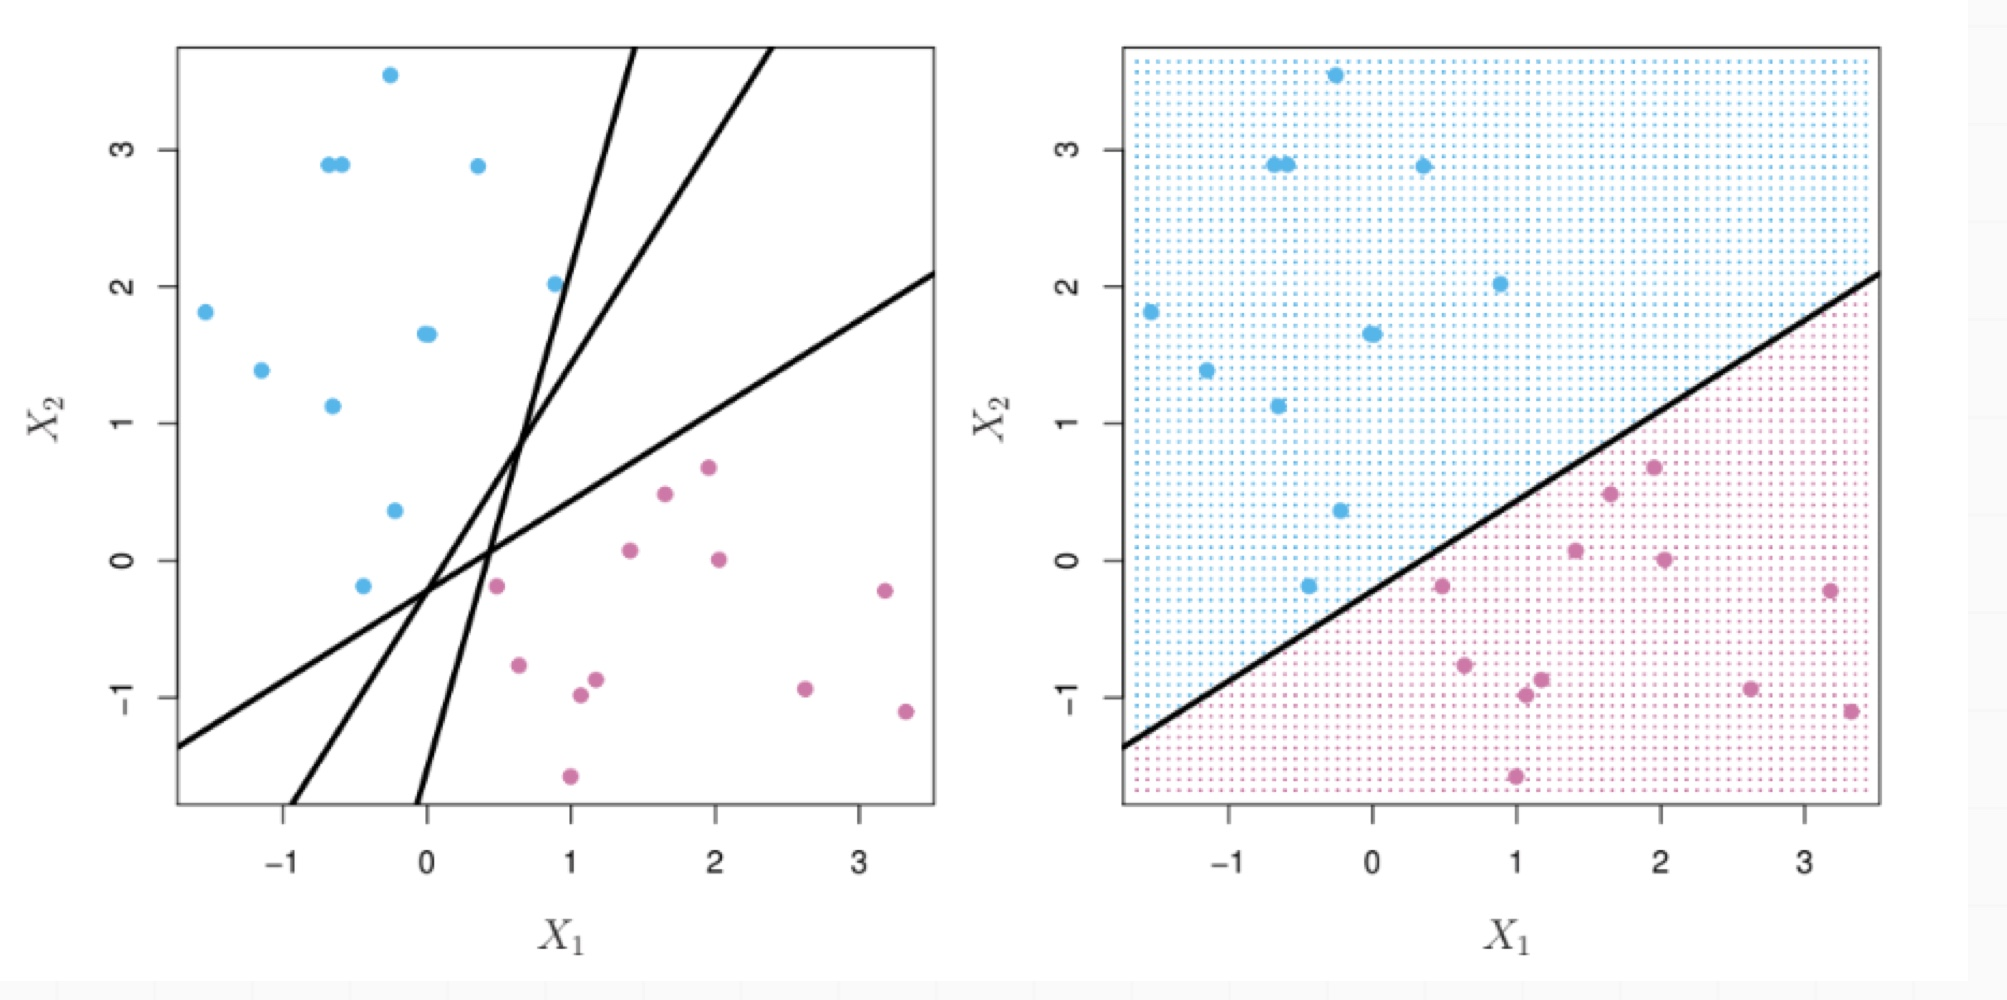

In [2]:
from IPython.display import display, Image

display(Image('Hyperplanes.jpg'))



*   If f(X) = *B0* + *B1* X1 + *B2* X2 + ... *Bp* Xp, then f(X) > 0 for points on one side of the hyperplane, and f(X) < 0 for points on the other.
*   If we code the colored points as Y*i*=+1 for blue, say, and Y*i*=-1 for mauve, then if Y*i* * f(X*i*) > 0 for all *i*, f(X)=0 defines a separating hyperplane.

  =>  f(X*i*) > 0 이면 Y*i* * f(X*i*) > 0, f(X*i*) < 0 이면 Y*i* * f(X*i*) < 0

* 이때 여러 개의 hyperplanes 존재, we find the one that makes the biggest gap or margin between the two classes.

  * *M* (마진): 관측치들로부터 초명면까지 가장 짧은 거리
* 즉, *M*을 maximize 하는 f(X) 찾는 것
* 이때 제약조건:

  summation *Bj*^2 = 1,
  
  *y_i* (*B0* + *B1* X*i*1 + *B2* X*i*2 + ... *Bp* X*i*p) >= *M*
  for all *i* = 1, ..., *N*
* 왜? 초평면에서 관측치까지의 거리 = 관측치가 올바르게 분류되었다는 신뢰성의 측도


### About the dataset

This data originally came from *Crowdflower's Data for Everyone library*.

2015년 2월 수집된 트위터 데이터로, 6개의 미 항공사에 대해 긍정적/부정적/중립 트윗을 분류하기 위해 사용됨

In [3]:
# uploaded = files.upload()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/Tweets.csv')

In [6]:
data.shape

(14640, 15)

In [7]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [10]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [11]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Data Preprocessing

tweet_created 열의 데이터 형식을 object에서 datetime으로 바꾸기

In [12]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date
# 날짜만 필요하고 시간은 필요 없는 경우 사용

In [13]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
# 날짜와 시간 모두 필요한 경우 사용

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [15]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [16]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [17]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

2015년 16일부터 25일까지 9일의 트위터 데이터

In [18]:
numberoftweets = data.groupby('tweet_created').size()

In [19]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

9일 동안 항공사에 대한 트윗이 매일 생성됨

In [20]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [21]:
print("Percentage of null or na values in df")
((data.isnull() | data.isna()).sum()*100 / data.index.size).round(2)
# null값이거나 na값인 행개수 더해서 전체 데이터 사이즈로 나눔

Percentage of null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**airline_sentiment_gold**, **negativereason_gold** have more than 99% missing data and **tweet_coord** has nearly 93% missing data. It would better delete these columns as they will not provide any constructive information.

참고) gold는 수작업으로 레이블링 되었다는 것, coord는 트윗이 작성된 위치의 좌표

In [22]:
del data['airline_sentiment_gold']
del data['negativereason_gold']
del data['tweet_coord']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [23]:
freq = data.groupby('negativereason').size()
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

### EDA

**Count of type of sentiment**

In [24]:
counter = data.airline_sentiment.value_counts()
counter

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Text(0, 0.5, 'Sentiment Count')

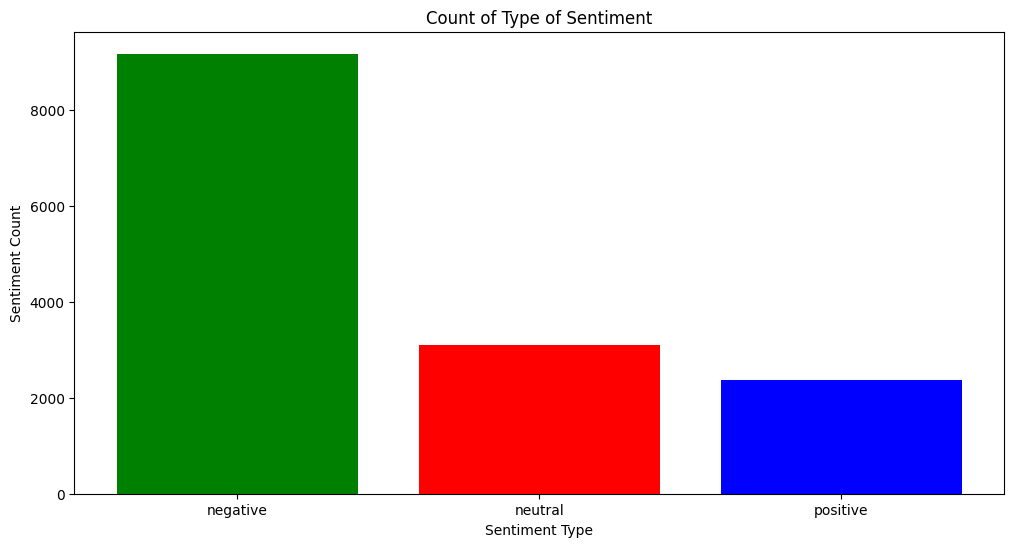

In [25]:
index = [1, 2, 3]
plt.figure(1, figsize=(12, 6))
plt.bar(index, counter, color=['green', 'red', 'blue'])
plt.xticks(index, ['negative', 'neutral', 'positive'], rotation=0)
plt.title('Count of Type of Sentiment')
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')

**Airline sentiments for each airline**

In [26]:
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


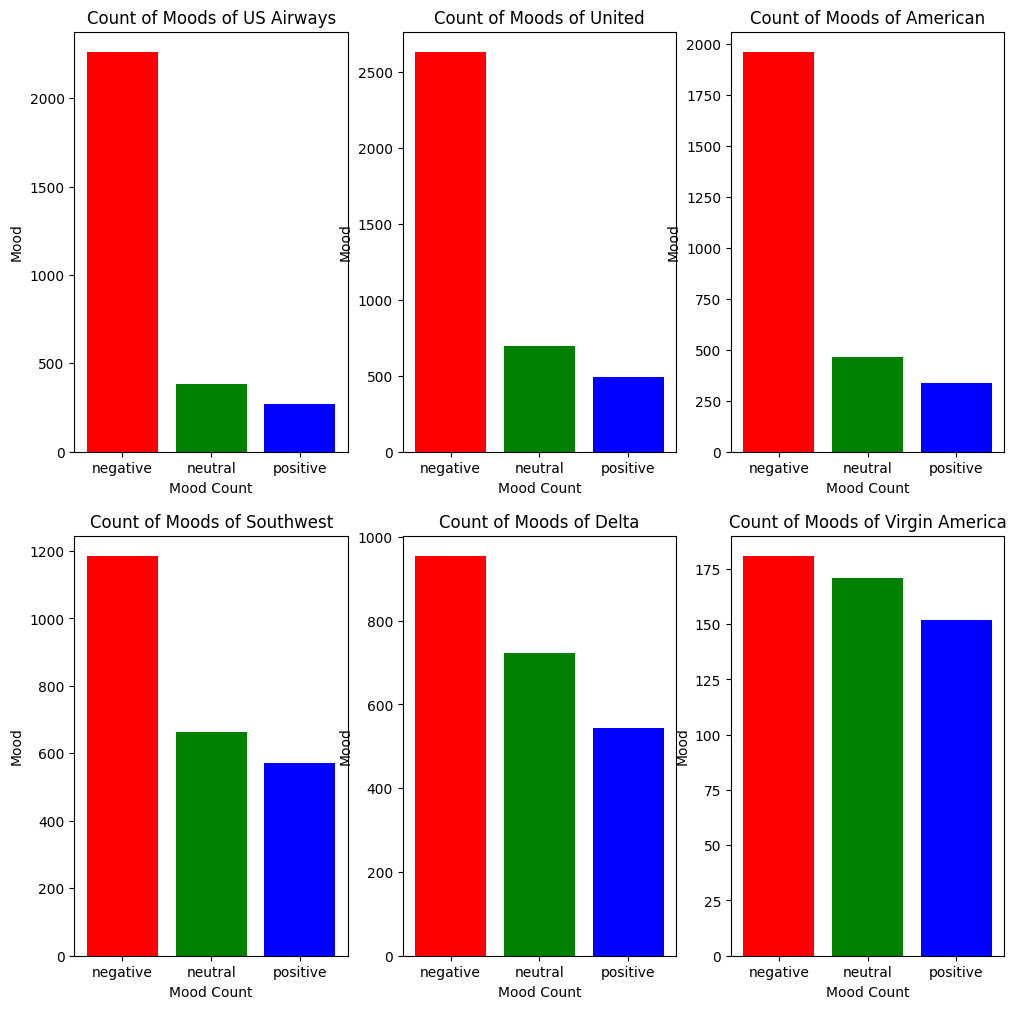

In [27]:
# 항공사로 그룹화해서 각 항공사에 대한 트윗의 개수 세기
print("Total number of tweets for each airline \n ", data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

airlines=['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.figure(1, figsize=(12, 12))
for i in airlines:
    indices = airlines.index(i) # 현재 항공사의 인덱스 가져오기
    plt.subplot(2, 3, indices+1) # 2*3 그리드의 인덱스+1 위치에 서브플롯 생성
    new_df = data[data['airline'] == i] # 현재 항공사의 데이터프레임 생성
    count = new_df['airline_sentiment'].value_counts() # 감정별 트윗 개수 세서 저장
    Index = [1, 2, 3] # 막대그래프의 x축 위치 정의
    plt.bar(Index, count, color=['red', 'green', 'blue'])
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.title('Count of Moods of '+i)
    plt.xlabel('Mood Count')
    plt.ylabel('Mood')

Looks like people are not having pleasant flights during the period. It would be important to know which airplines please their customers the most and vice versa, so we will be looking at the percentage of the negative reviews for each airline.

In [28]:
neg_tweets = data.groupby(['airline', 'airline_sentiment']).count().iloc[:, 0]
neg_tweets

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64

In [29]:
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()
total_tweets

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

In [30]:
my_dict = {'American': neg_tweets[0] / total_tweets[0],
           'Delta': neg_tweets[3] / total_tweets[1],
           'Southwest': neg_tweets[6] / total_tweets[2],
           'US Airways': neg_tweets[9] / total_tweets[3],
           'United': neg_tweets[12] / total_tweets[4],
           'Virgin': neg_tweets[15] / total_tweets[5]}
my_dict

{'American': 0.7104023196810438,
 'Delta': 0.4297929792979298,
 'Southwest': 0.4900826446280992,
 'US Airways': 0.7768623412289736,
 'United': 0.6889063317634746,
 'Virgin': 0.35912698412698413}

In [31]:
perc = pd.DataFrame.from_dict(my_dict, orient='index')
perc.columns = ['Percentage of Negative']
perc

,Percentage of Negative
American,0.710402
Delta,0.429793
Southwest,0.490083
US Airways,0.776862
United,0.688906
Virgin,0.359127


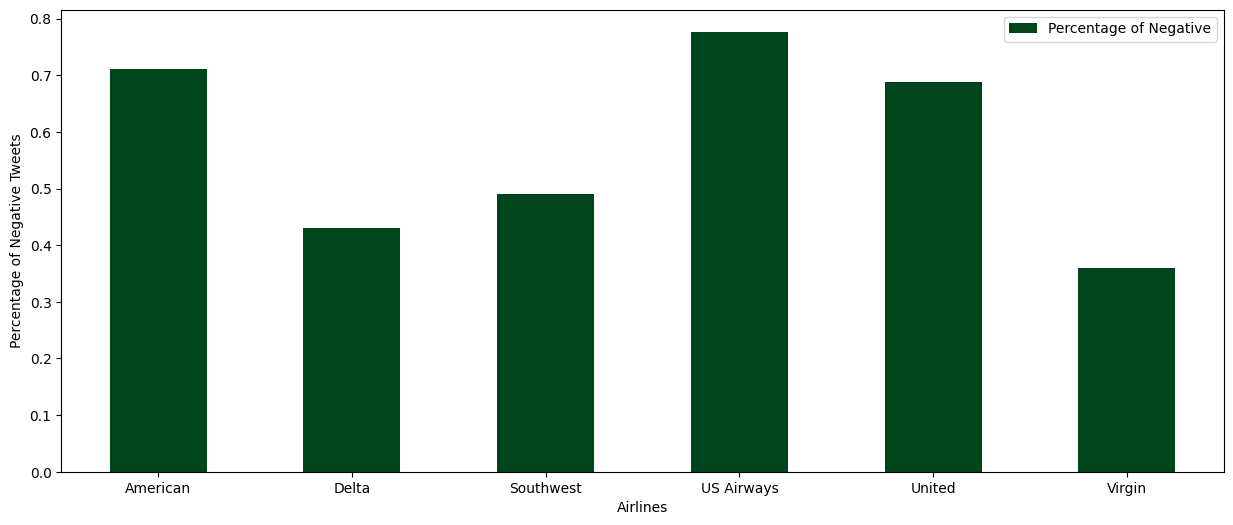

In [32]:
ax = perc.plot(kind='bar', rot=0, colormap='Greens_r', figsize=(15, 6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of Negative Tweets')
plt.show()



*   American, US Airways, and United substantially got negative reactions.
*   Tweets for Southwest are the most balanced.



<Axes: xlabel='airline'>

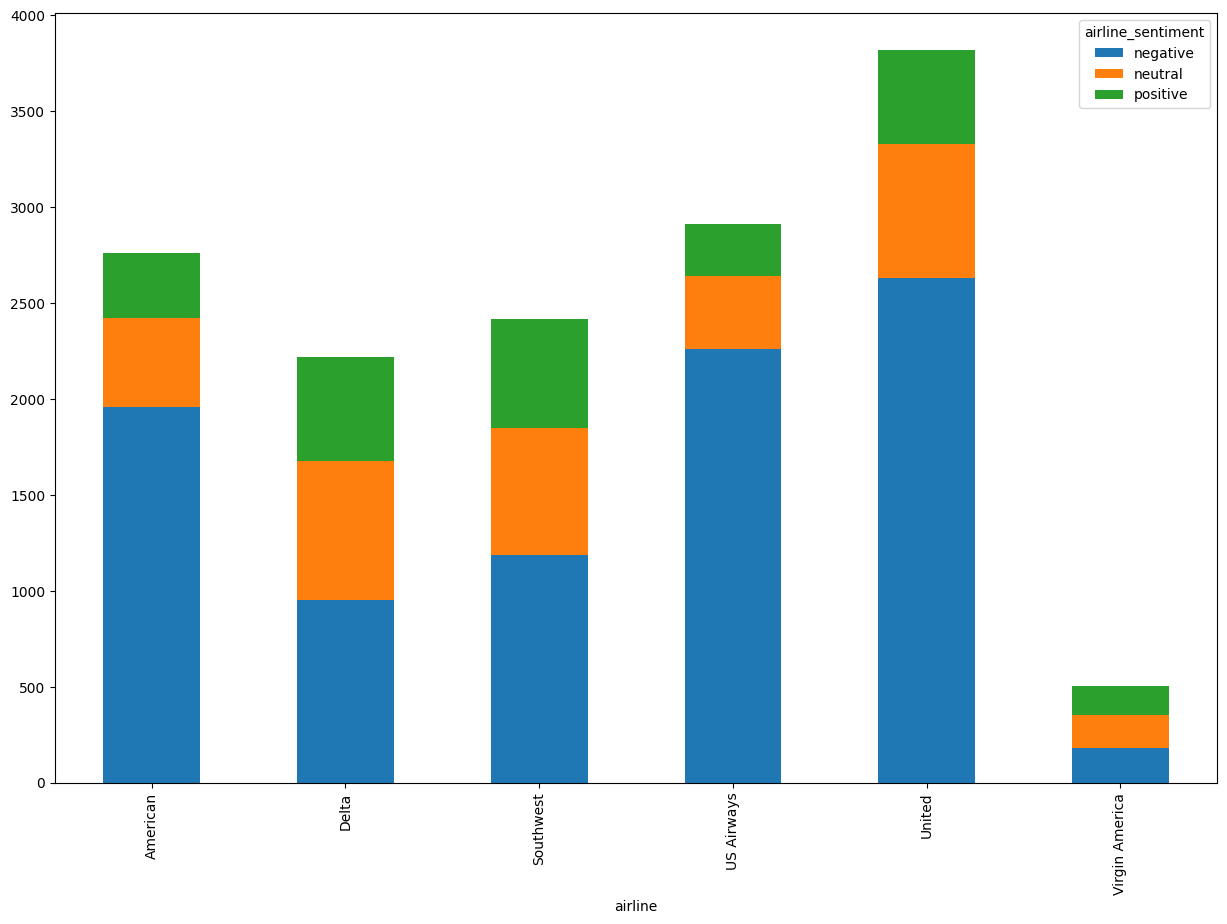

In [33]:
figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15, 10))

In [34]:
print(figure_2)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


이제 왜 negative인지 알아보자

10가지 큰 이유로 나눠져 있음

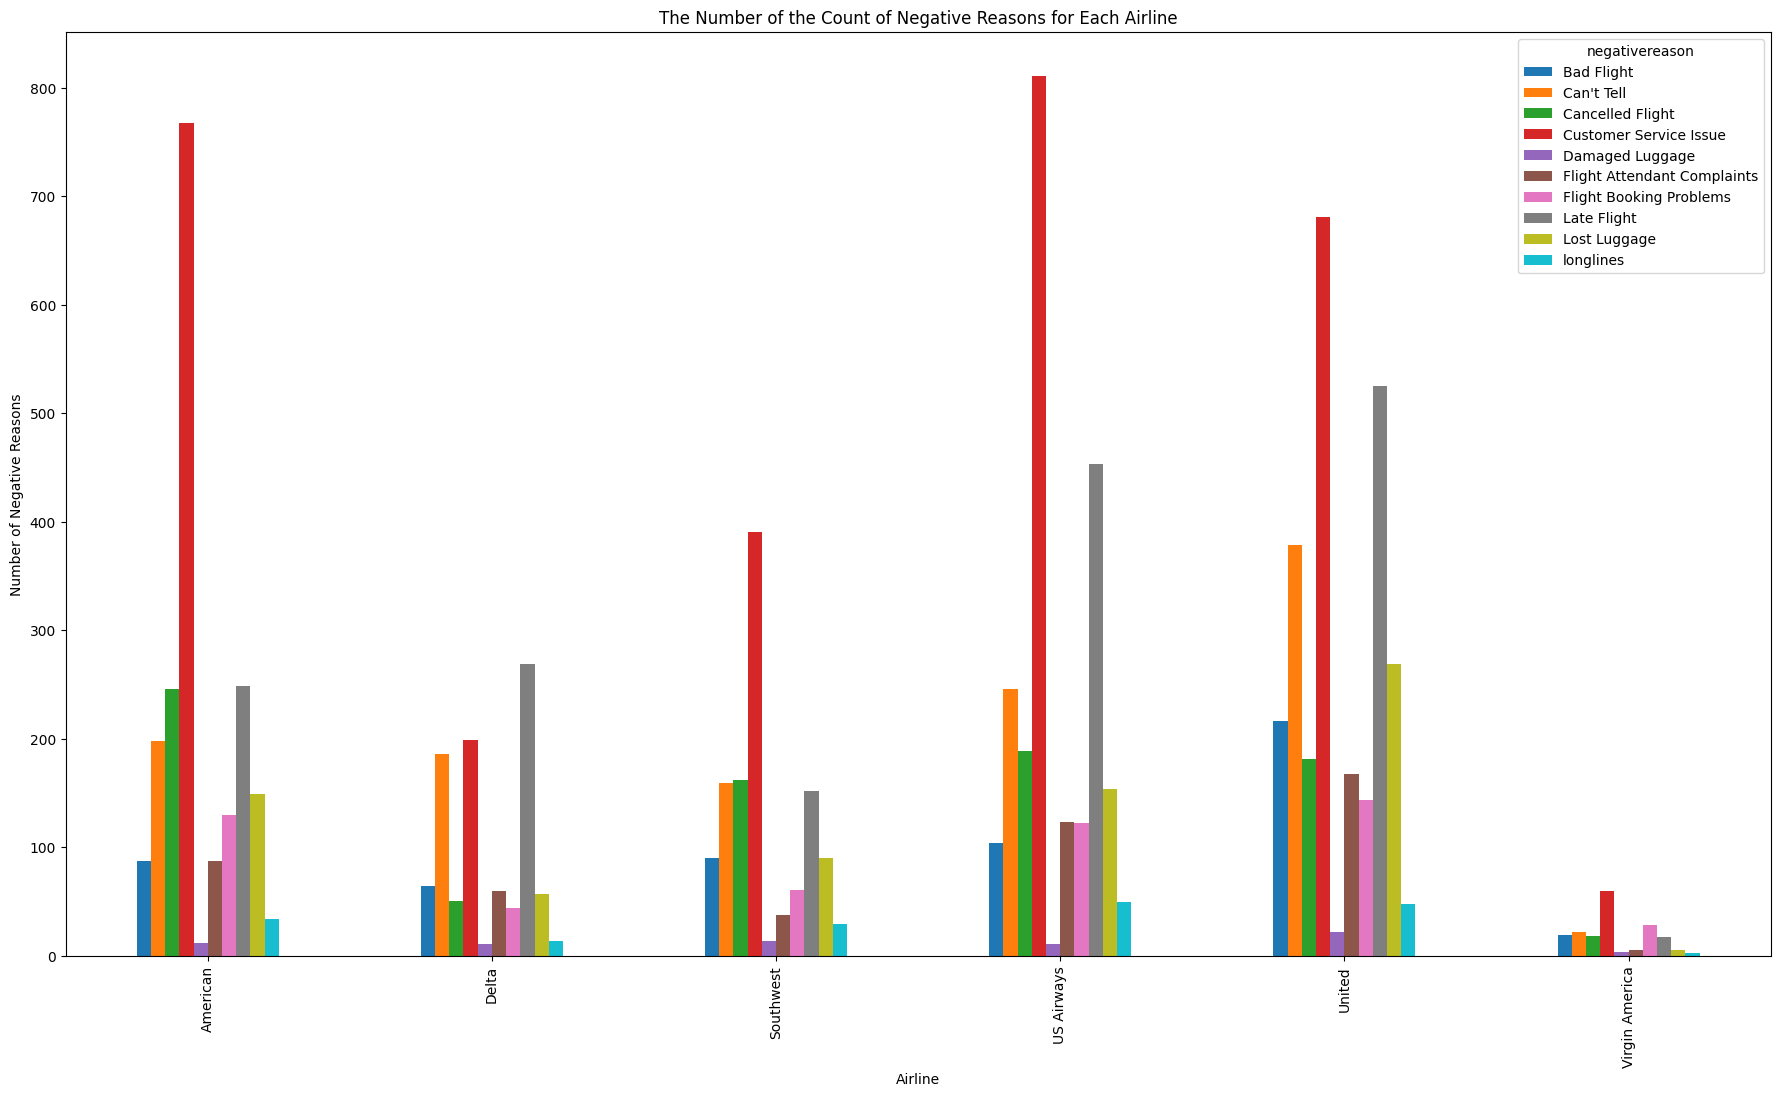

In [35]:
negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline', 'negativereason']).sum().unstack().plot(kind='bar', figsize=(22, 12))
plt.title('The Number of the Count of Negative Reasons for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Reasons')
plt.show()

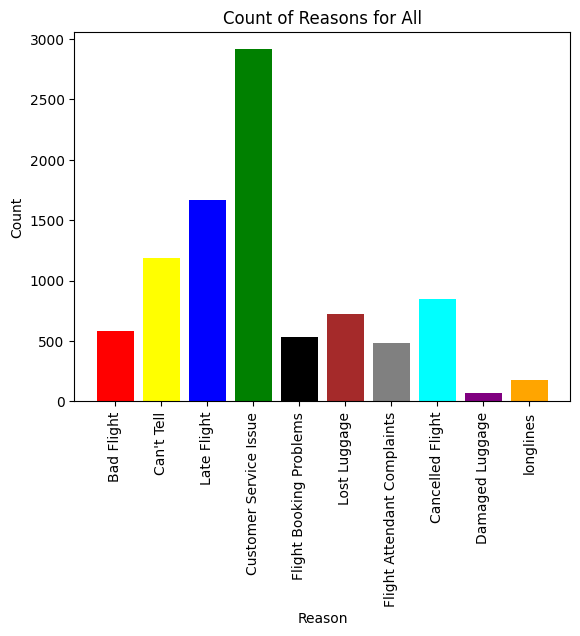

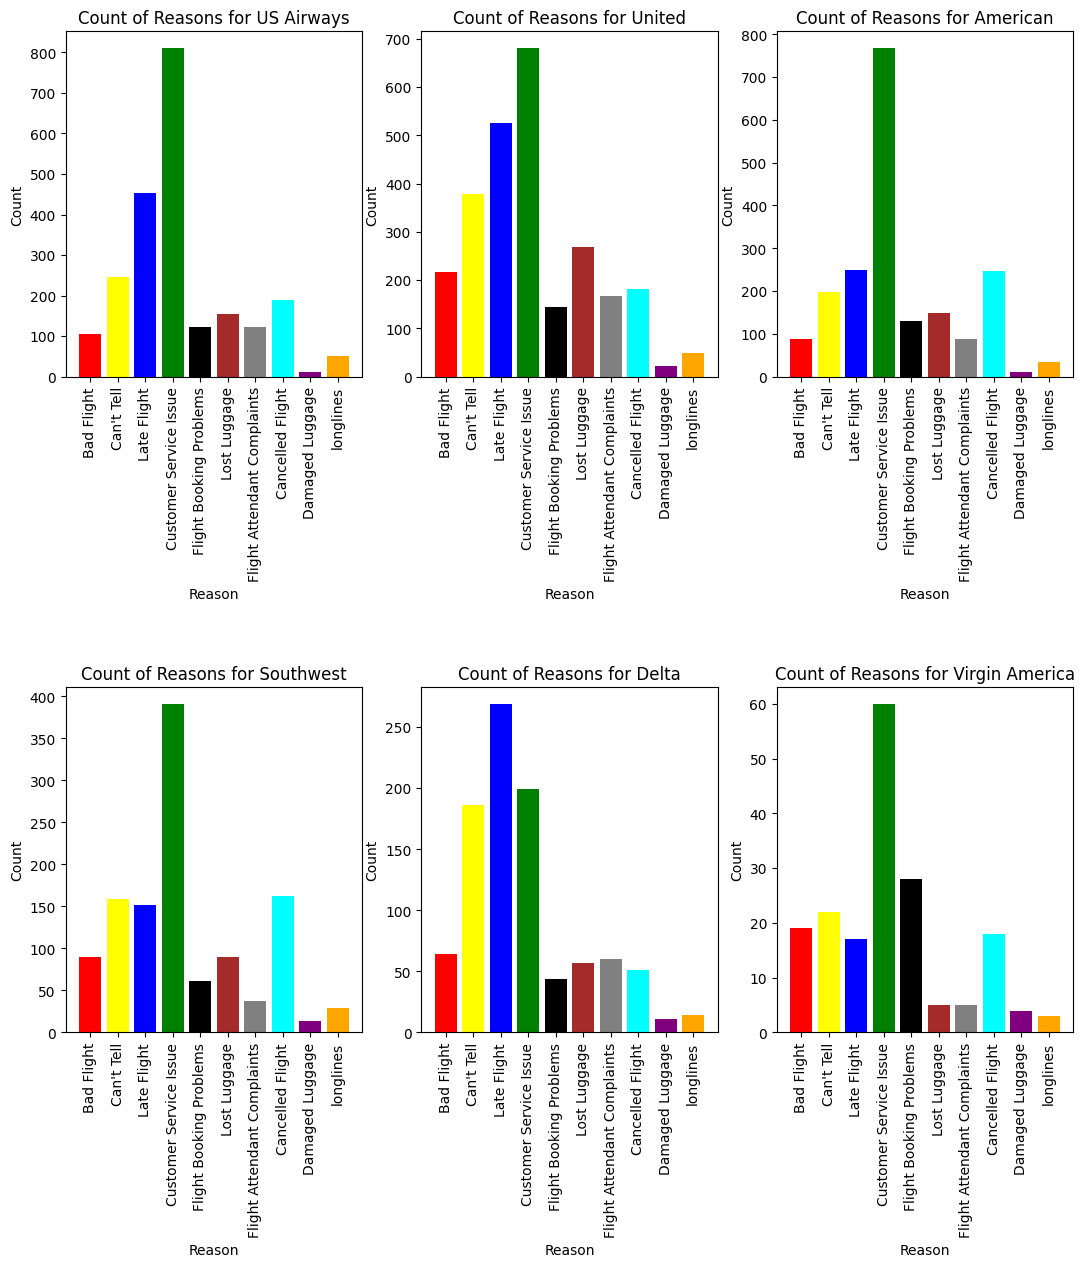

In [36]:
#get the number of negative reasons
data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts()) # 각 부정적인 이유의 빈도 세서 딕셔너리로 저장
    Unique_reason=list(data['negativereason'].unique()) # 열의 고유한 값 가져와 리스트로 변환
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan'] # na값 제외
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):

    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1)) # x축에 사용될 인덱스 생성
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

# 전체 항공사에 대한 부정적인 이유 시각화
plot_reason('All')
# 개별 항공사에 대한 부정적인 이유 시각
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)



*   전체 항공사에 대해 Customer Service Issue가 주요 이유, 특히 US Airways, United, American, Southwest, Virgin
*   Late Flight은 Delta의 주요 이유
*   Virgin과 반대로, US Airways, United, American은 500개 이상의 부정적 이유 (특히 Late Flight, Customer Service Issue)



**Is there a relationship between negative sentiments and date?**

트윗 작성 날짜가 감정에 영향을 미친다면?

In [37]:
# 인덱스 붙이기
date = data.reset_index()
date.head()

,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [38]:
date.tweet_created = pd.to_datetime(date.tweet_created).dt.date
date.tweet_created.head()

df = date
day_df = df.groupby(['tweet_created', 'airline', 'airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

In [39]:
day_df = day_df.loc(axis=0)[:, :, 'negative']
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
               United          negative               2
2015-02-17     Delta           negative             108
               Southwest       negative             213
               US Airways      negative             233
               United          negative             272
               Virgin America  negative              12
2015-02-18     American        negative               1
               Delta           negative             105
               Southwest       negative             110
               US Airways      negative             244
               United          negative             257
               Virgin America  negative              19
2015-02-19     Delta           negative             135
               Southwest       negative             127
               US Airways      negative             193
               United          negative             272

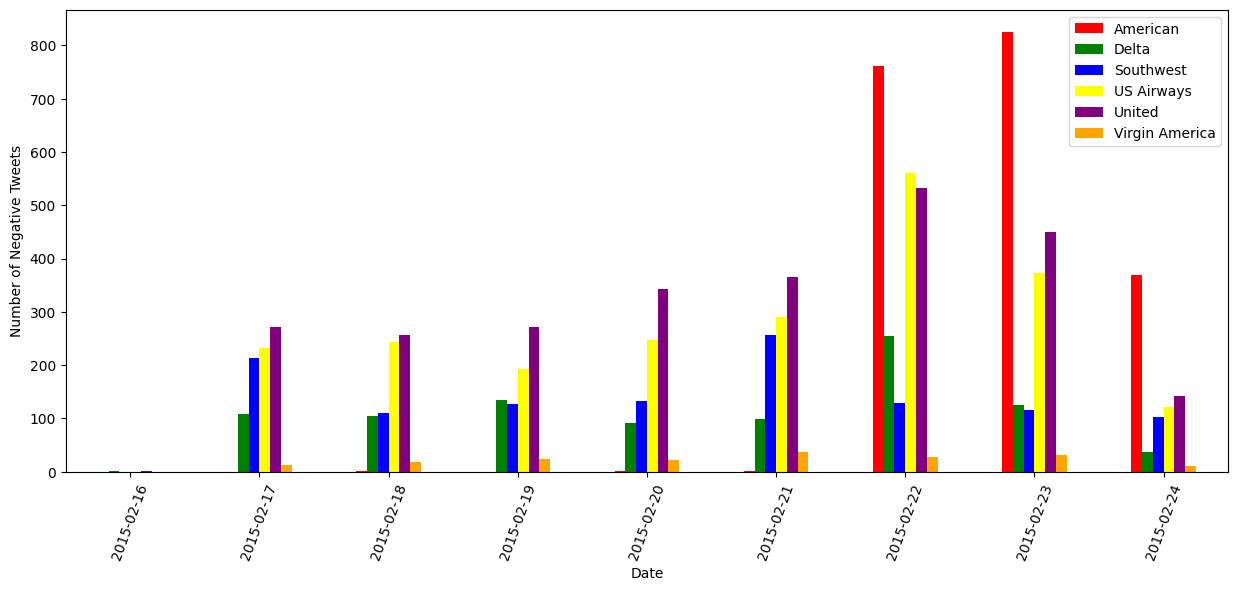

In [40]:
ax2 = day_df.groupby(['tweet_created', 'airline']).sum().unstack().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple', 'orange'],
                                                                        figsize=(15, 6), rot=70)
labels = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Negative Tweets')
plt.show()



*   American은 2월 23일에 갑자기 튀고 다음날인 24일에 감소함 (Customer Service Issue가 있었던 듯?)
*   Virgin American을 9일 동안 가장 적은 부정적 트윗을 가짐. 근데 total number도 작았던 것 주의
*   모든 항공사의 부정적 트윗은 slightly skewed towards the end of the week



**Wordcloud for Positive Reasons**

In [41]:
from wordcloud import WordCloud, STOPWORDS

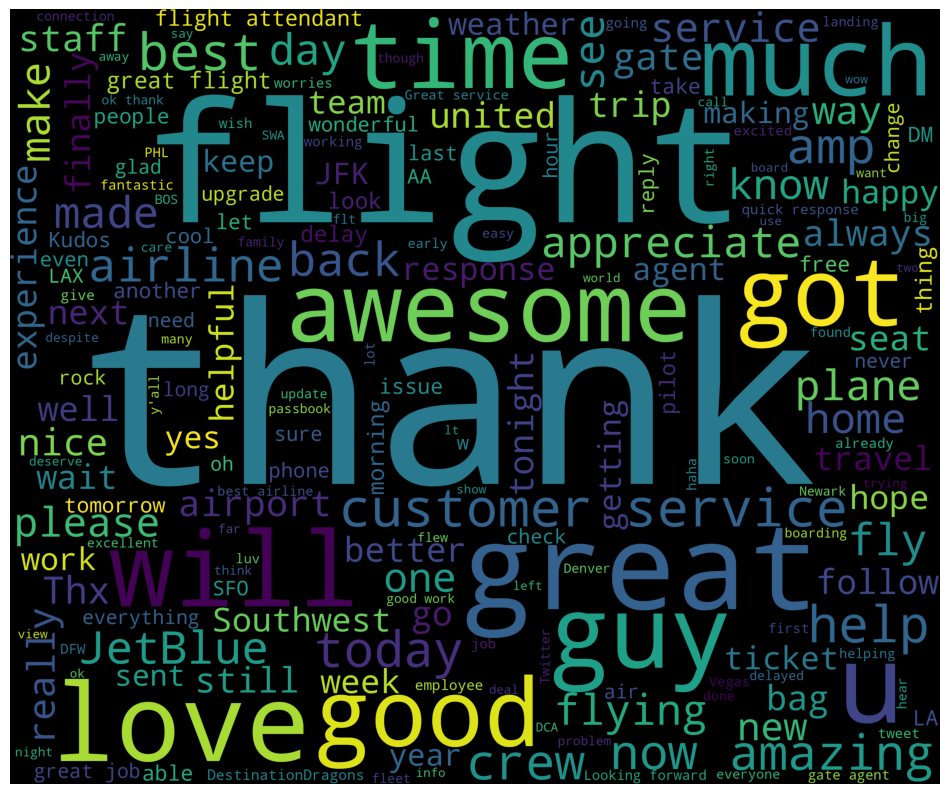

In [42]:
new_df=data[data['airline_sentiment']=='positive'] # 긍정적인 트윗 필터링
words = ' '.join(new_df['text']) # new_df의 'text' 열에 있는 모든 트윗을 하나의 긴 문자열로 결합, 각 트윗은 공백으로 구분
cleaned_word = " ".join([word for word in words.split() # 'words' 문자열을 공백 기준으로 분할해 리스트를만들고, 리스트 내에서 특정 조건에 해당하지 않는 단어만 남겨 다시 공백으로 결합
                            if 'http' not in word # 'http'가 포함된 단어 (링크 제거)
                                and not word.startswith('@') # '@'로 시작하는 단어 (언급 제거)
                                and word != 'RT' # 'RT' 제거 (리트윗 제거)
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Wordcloud for Negative Reasons**

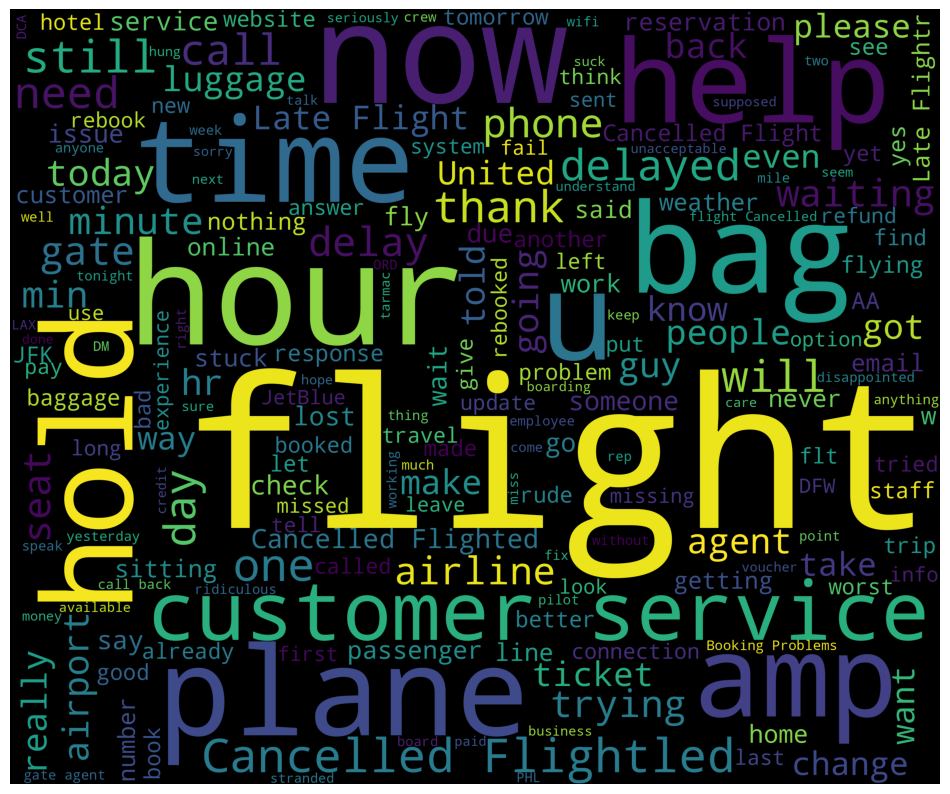

In [43]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Dropping the rows with neutral sentiments**

In [44]:
data.drop(data.loc[data['airline_sentiment'] == 'neutral'].index, inplace=True)

**Lable encoding on airline_sentiment**

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


**Preprocessing the tweet text data**

text를 클리닝하고 분류해보자

In [46]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [47]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vectorization

In [48]:
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

11541 11541


In [49]:
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [52]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [53]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

Why vectorizing?

* 텍스트 데이터를 모델에 입력할 수 있는 형태로 변환하기 위해. 특히 자연어 처리에서는 텍스트 데이터를 숫자 형태로 변환해야 컴퓨터가 이해하고 처리한다. 이 과정을 피처 추출이라고 한다.

* 여기서 사용한 CountVectorizer는 각 문서를 토큰(단어)의 출현 빈도를 기록한 벡터로 변환한다. 예를 들어, "I love this airline. It's the best!"라는 문서가 있다면, CountVectorizer는 이문서를 다음과 같은 형태의 벡터로 변환한다.

  [1, 1, 1, 1, 1]

  여기서 벡터의 각 요소는 해당 단어가 문서에 나타난 횟수를 나타낸다. (the, it's와 같은 단어들은 불용어로 간주하고 무시한다)

### Model Building

In [54]:
# training SVM model with linear kernel

from sklearn.svm import SVC # Support Vector Classification

model = SVC(kernel='linear', random_state=10)
model.fit(x_train_dtm, y_train)

# prediction
pred = model.predict(x_test_dtm)

SVM에서 커널은 입력 데이터를 고차원 특징 공간으로 매핑하는 함수. SVM은 주어진 데이터를 분류하기 위해 결정 경계를 찾는 데 사용되며, 커널은 데이터를 원래의 입력 공간에서 고차원 특징 공간으로 변환하여 선형 분리가 가능한 경우에 성능을 향상시키는 데 도움을 준다.

일반적으로 SVM은 선형 분리가 가능한 경우 사용되지만, 현실 세계의 많은 문제는 선형적으로 분리되지 않는다. 이때 kernel trick이라는 기법을 사용해 원래의 입력 공간에서는 선형 분리가 불가능한 문제를 고차원 특징 공간으로 매핑하여 가능하게 만들 수 있다.

1. 선형 커널: 기본적으로 입력 공간에서의 선형 분리를 시도한다. 즉, 원래의 특징 공간에서 입력 데이터를 변경하지 않고 그대로 사용한다.

2. 다항 커널: 입력 데이터를 고차원 공간으로 매핑하여 비선형 관계를 선형 관계로 변환한다.

3. Radial Basis Function 커널: 가우시안  함수를 기반으로 입력 데이터를무한 차원의 고차원 공간으로 매핑하여 비선형 관계를 처리한다.SVM에서 가장 일반적으로 사용되는 커널 중 하

**성능평가**

In [55]:
accuracy_score_1 = accuracy_score(y_test, pred)
accuracy_score_1

0.9081774081774082

In [56]:
cm = confusion_matrix(y_test, pred)
cm

array([[2194,  129],
       [ 136,  427]])

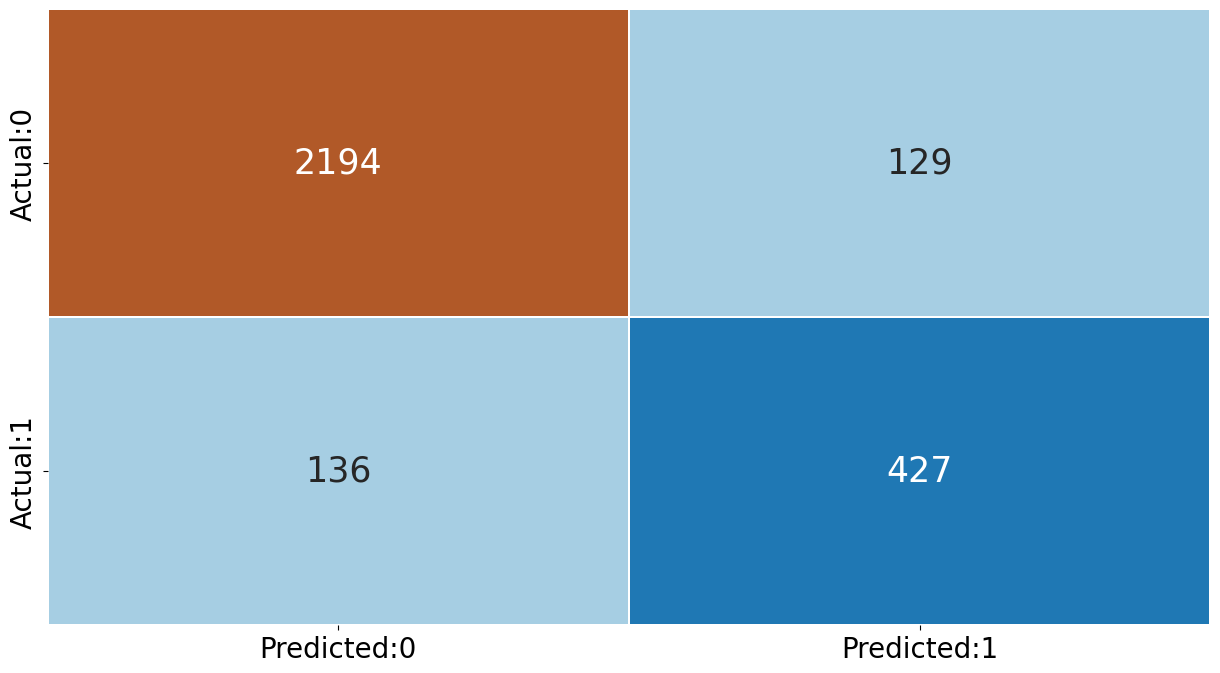

In [57]:
plt.rcParams['figure.figsize'] = [15, 8]

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size':25})
# annot=True: 각 셀에 숫자를 표시
# fmt='d': 숫자를 정수 형식으로 표시
# cmap='Paired': 색상 맵 지정
# cbar=False: 컬러 바 표시하지마
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886



**추가 - 커널 바꿔보기**

1) linear kernel (위에서)

2) polynomial kernel

In [59]:
model2 = SVC(kernel='poly', random_state=10)
model2.fit(x_train_dtm, y_train)

# prediction
pred2 = model2.predict(x_test_dtm)

In [60]:
accuracy_score_2 = accuracy_score(y_test, pred2)
accuracy_score_2

0.8229383229383229

In [61]:
cm2 = confusion_matrix(y_test, pred2)
cm2

array([[2312,   11],
       [ 500,   63]])

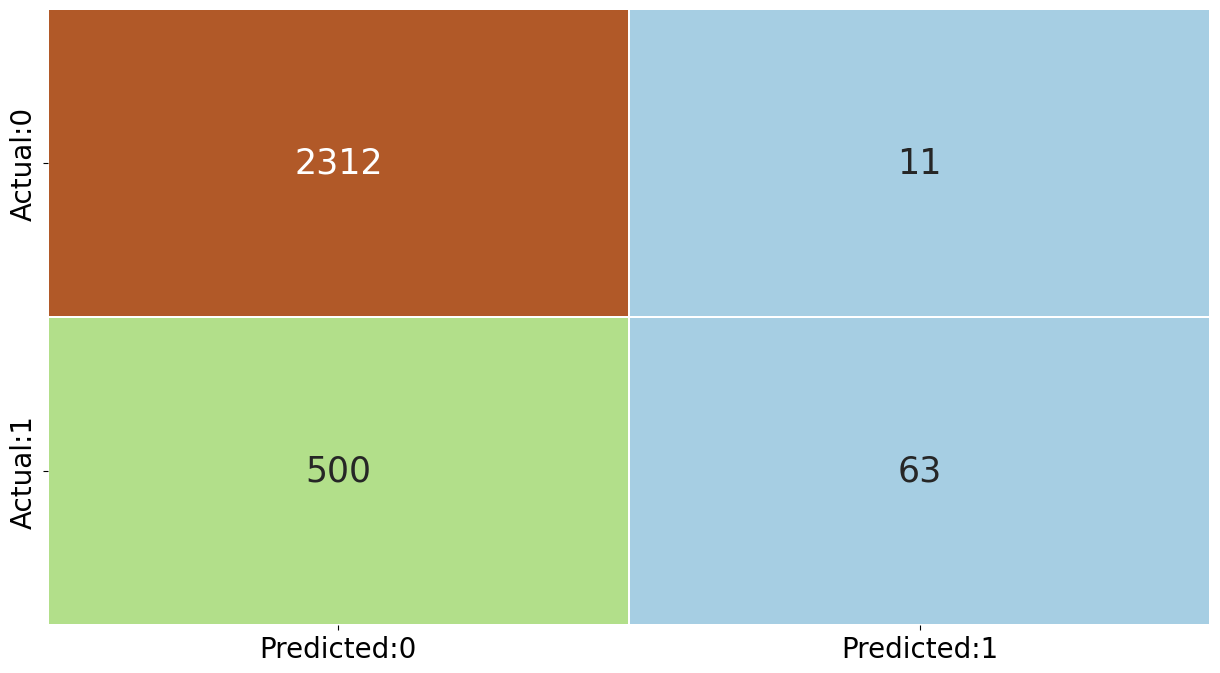

In [62]:
plt.rcParams['figure.figsize'] = [15, 8]

conf_matrix2 = pd.DataFrame(data=cm2, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

3) radial basis function kernel

In [63]:
model3 = SVC(kernel='rbf', random_state=10)
model3.fit(x_train_dtm, y_train)

# prediction
pred3 = model3.predict(x_test_dtm)

In [64]:
accuracy_score_3 = accuracy_score(y_test, pred3)
accuracy_score_3

0.9019404019404019

In [65]:
cm3 = confusion_matrix(y_test, pred3)
cm3

array([[2264,   59],
       [ 224,  339]])

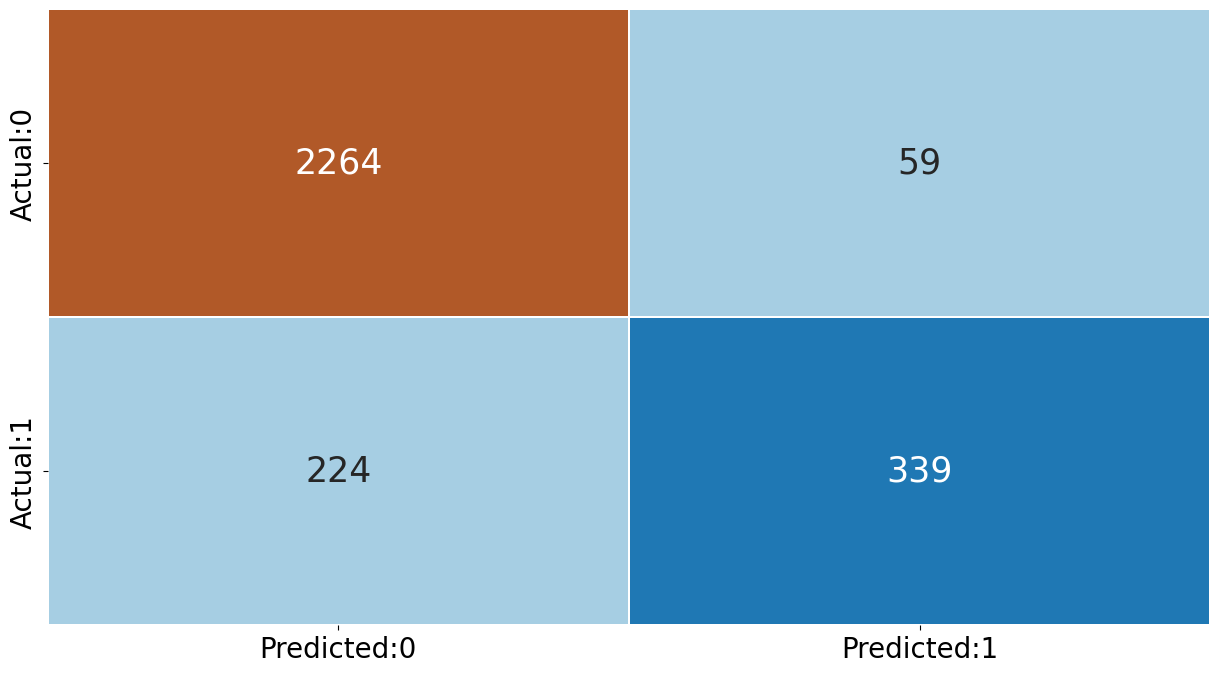

In [66]:
plt.rcParams['figure.figsize'] = [15, 8]

conf_matrix3 = pd.DataFrame(data=cm3, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**성능 비교**

In [67]:
print(f"Linear kernel Accuracy: {accuracy_score_1:.4f}")
print(f"Polynomial kernel Accuracy: {accuracy_score_2:.4f}")
print(f"RBF kernel Accuracy: {accuracy_score_3:.4f}")

Linear kernel Accuracy: 0.9082
Polynomial kernel Accuracy: 0.8229
RBF kernel Accuracy: 0.9019


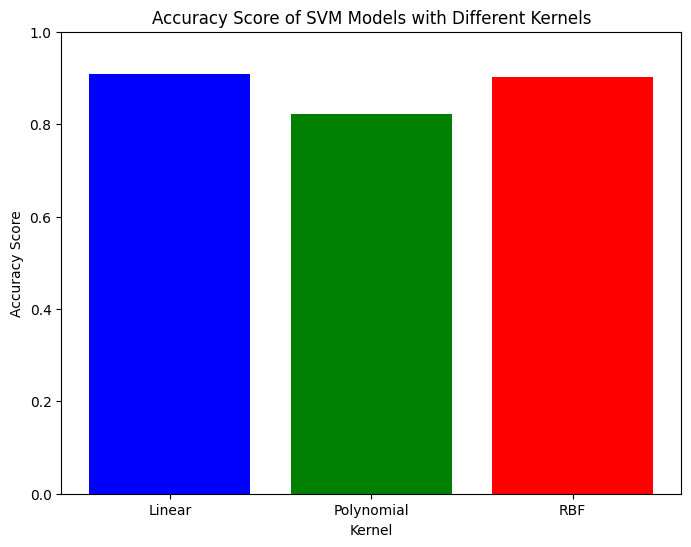

In [68]:
plt.figure(figsize=(8, 6))
plt.bar(['Linear', 'Polynomial', 'RBF'], [accuracy_score_1, accuracy_score_2, accuracy_score_3], color=['blue', 'green', 'red'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of SVM Models with Different Kernels')
plt.ylim(0.0, 1.0)  # y 축 범위 설정
plt.show()